# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Combine data for Weather and Air quality](#3.4.1_Ski_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Draw two dimensional plot for each features](#3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics)
    * [3.5.2 Resort density](#3.5.2_Resort_density)
      * [3.5.2.1 Top states by resort density](#3.5.2.1_Top_states_by_resort_density)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)
      * [3.5.3.3 Average ticket price by state](#3.5.3.3_Average_ticket_price_by_state)
      * [3.5.3.4 Adding average ticket price to scatter plot](#3.5.3.4_Adding_average_ticket_price_to_scatter_plot)
    * [3.5.4 Conclusion On How To Handle State Label](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
    * [3.5.5 Ski Resort Numeric Data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Feature engineering](#3.5.5.1_Feature_engineering)
      * [3.5.5.2 Feature correlation heatmap](#3.5.5.2_Feature_correlation_heatmap)
      * [3.5.5.3 Scatterplots of numeric features against ticket price](#3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

So far for this project, I extracted the weather and air quality data. I cleaned those data and combine to a single data frame. The air quality data is the time series data. In this notebook, I will explore more about this data graphically. For this time series data, we will check we can add few more information from time.  

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Combine Weather and Climate data<a id='3.4.1_Combine_dat'></a>

In [2]:
data = pd.read_csv('../data/realdata/airquality_climate_combine.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1675 non-null   object 
 1   T       1675 non-null   float64
 2   TM      1675 non-null   float64
 3   Tm      1675 non-null   float64
 4   H       1675 non-null   float64
 5   PP      1675 non-null   float64
 6   VV      1675 non-null   float64
 7   V       1675 non-null   float64
 8   VM      1675 non-null   float64
 9   AQI     1675 non-null   float64
dtypes: float64(9), object(1)
memory usage: 131.0+ KB


In [4]:
data.head()

,date,T,TM,Tm,H,PP,VV,V,VM,AQI
0,2017-03-24,17.6,25.0,10.6,72.0,0.00,5.1,10.4,25.9,162.0
1,2017-03-25,19.2,27.0,10.0,69.0,15.49,5.6,5.6,14.8,156.0
2,2017-03-26,19.4,27.5,14.6,75.0,0.00,4.8,10.0,24.1,131.0
3,2017-03-27,20.2,27.0,15.5,73.0,0.00,5.0,8.5,22.2,169.0
4,2017-03-28,19.9,22.5,16.5,79.0,0.00,4.0,5.6,14.8,162.0


In [5]:
# check for datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1675 non-null   object 
 1   T       1675 non-null   float64
 2   TM      1675 non-null   float64
 3   Tm      1675 non-null   float64
 4   H       1675 non-null   float64
 5   PP      1675 non-null   float64
 6   VV      1675 non-null   float64
 7   V       1675 non-null   float64
 8   VM      1675 non-null   float64
 9   AQI     1675 non-null   float64
dtypes: float64(9), object(1)
memory usage: 131.0+ KB


In [6]:
# convert date to datetime pandas type
data['date'] = pd.to_datetime(data['date'])

In [7]:
#data.set_index('date',inplace=True)

## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Histogram from each features<a id='3.5_Histogram_The_Data'></a>

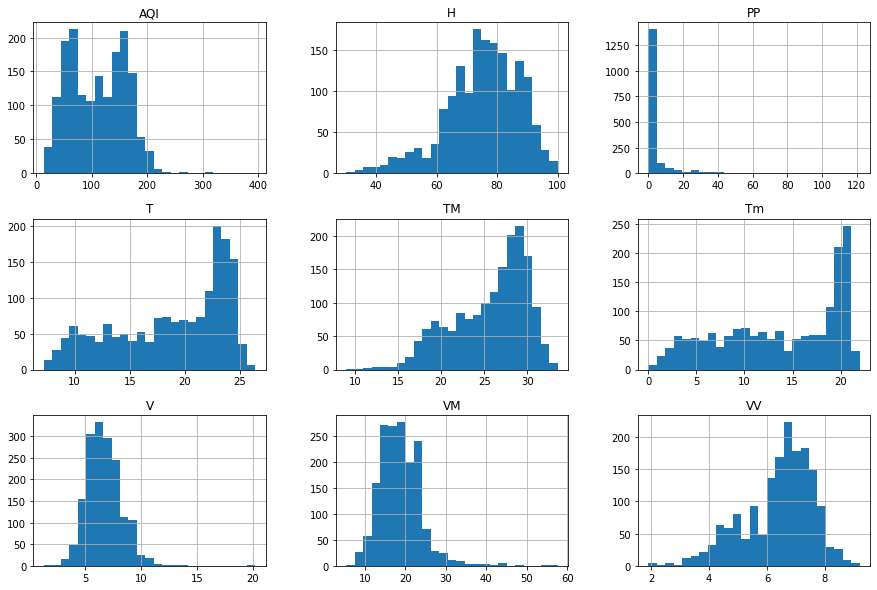

In [8]:
# 1d plot of these features first
data.hist(bins=25,figsize=(15,10))
plt.show();

There are so many information we can draw from these histogram. 
* `AQI` has two prominent peak below 100 and above 100. This can be explore with time to make sense. 
* Second row of above plot has temperature variables, and are showing similar distribution. In addition, the data  contain higher counts for average temperature higher than 20. 
* `PP` feature is more skewed. 

In [9]:
# make scatter plot with AQI 
# define useful function to create scatterplots of AQI against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AQI', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='AQI value')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [10]:
features = [col for col in data.columns if col not in ['AQI','date']]

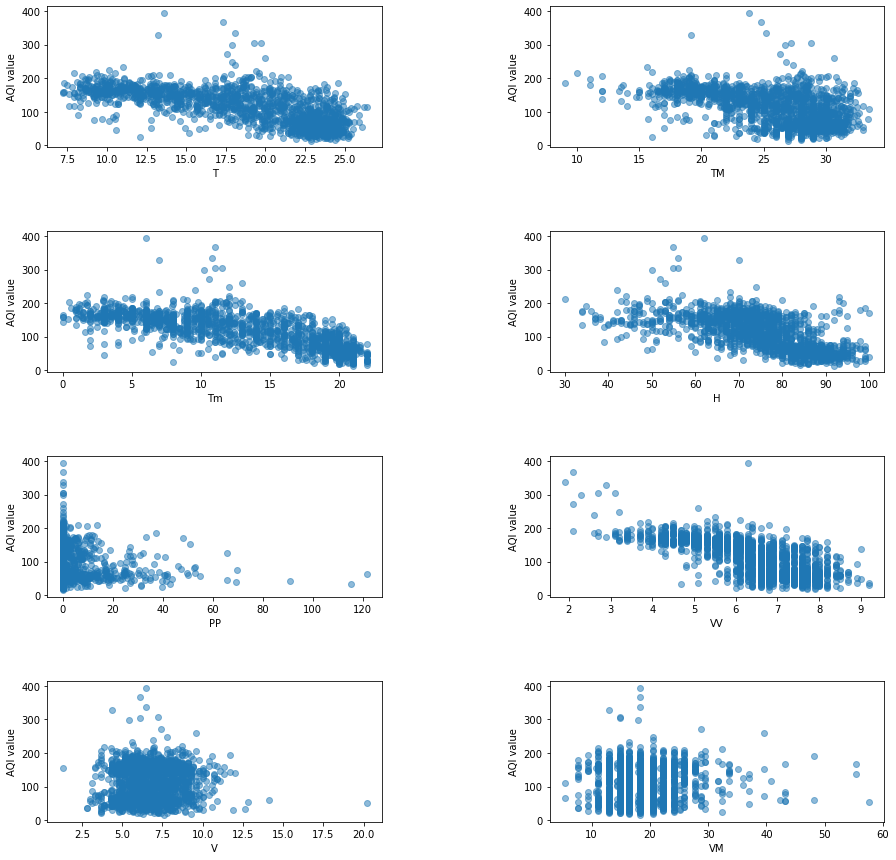

In [11]:
scatterplots(features, ncol=2, figsize=(15, 15))

### 3.5.2 Check correlation between features<a id='3.5_2_Correlation'></a>

* three temperature values show high correlation. So keep a single temperature value is a good idea.

In [13]:
# linear plot between date and other variable

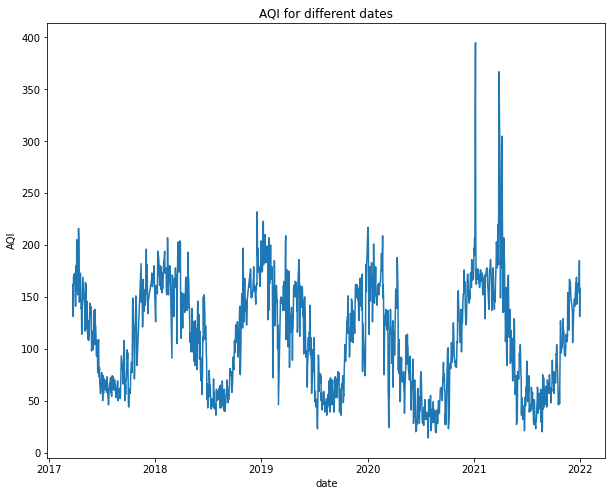

In [14]:
# AQI as the function of time
plt.figure(figsize=(10,8))
plt.plot(data['date'],data['AQI'])
plt.title('AQI for different dates')
plt.xlabel('date')
plt.ylabel('AQI')
plt.show()

In [15]:
# the air quality index show periodic nature with date. That means it depends on season of the year. 

In [16]:
# lets create a feature named month

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1675 non-null   datetime64[ns]
 1   T       1675 non-null   float64       
 2   TM      1675 non-null   float64       
 3   Tm      1675 non-null   float64       
 4   H       1675 non-null   float64       
 5   PP      1675 non-null   float64       
 6   VV      1675 non-null   float64       
 7   V       1675 non-null   float64       
 8   VM      1675 non-null   float64       
 9   AQI     1675 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 131.0 KB


In [20]:
data['Month'] = data['date'].dt.month

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1675 non-null   datetime64[ns]
 1   T       1675 non-null   float64       
 2   TM      1675 non-null   float64       
 3   Tm      1675 non-null   float64       
 4   H       1675 non-null   float64       
 5   PP      1675 non-null   float64       
 6   VV      1675 non-null   float64       
 7   V       1675 non-null   float64       
 8   VM      1675 non-null   float64       
 9   AQI     1675 non-null   float64       
 10  Month   1675 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 144.1 KB


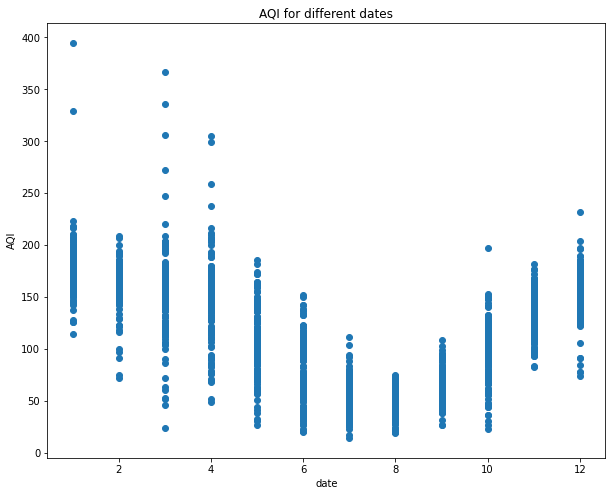

In [23]:
# AQI as the function of month
plt.figure(figsize=(10,8))
plt.scatter(data['Month'],data['AQI'])
plt.title('AQI for different dates')
plt.xlabel('date')
plt.ylabel('AQI')
plt.show()

In [26]:
# this shows air quality for different month

In [30]:
# air quality group by day of the month
data.groupby(data['date'].dt.weekday)['AQI'].mean()

date
0    109.382353
1    113.155462
2    114.091667
3    111.743802
4    111.336100
5    110.369748
6    107.008403
Name: AQI, dtype: float64

In [ ]:
# monday = 0, sunday=6

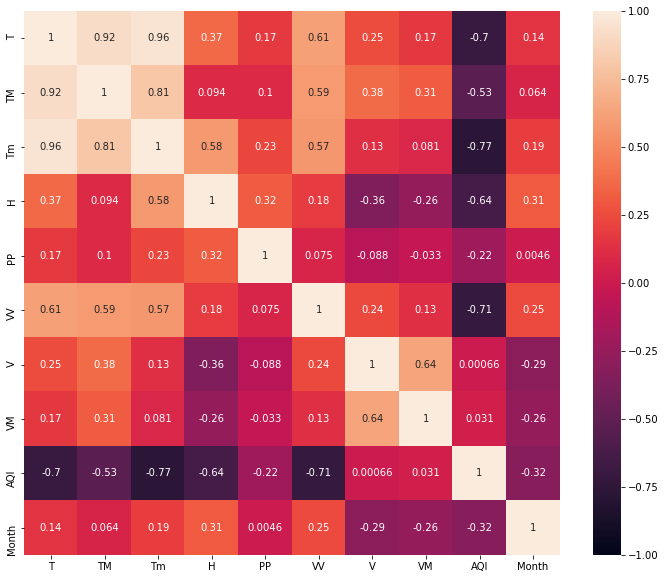

In [25]:
# check correlation with heat map
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True);

In [31]:
# There are three temperatures which are highly correlated. Lets drop TM and Tm and keep T only
data.drop(columns=['TM','Tm'],axis=1,inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1675 non-null   datetime64[ns]
 1   T       1675 non-null   float64       
 2   H       1675 non-null   float64       
 3   PP      1675 non-null   float64       
 4   VV      1675 non-null   float64       
 5   V       1675 non-null   float64       
 6   VM      1675 non-null   float64       
 7   AQI     1675 non-null   float64       
 8   Month   1675 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 117.9 KB


In [33]:
data.set_index('date',inplace=True)

In [35]:
#data.to_csv('../data/realdata/exploratory_air_quality.csv',index=True)

## Scale the data

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# scale data
scaler = StandardScaler()
scaler.fit(data[])

X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

## PCA calculation